# [이시국 코로나 sns 분석]

## Step 1) 트위터&네이버블로그 크롤링

### 1. 트위터
#### "우한폐렴" or "코로나"
GetOldTweet3 패키지 사용

In [1]:
import GetOldTweets3 as got
from bs4 import BeautifulSoup

In [3]:
# 가져올 범위를 정의

import datetime

days_range = []

start = datetime.datetime.strptime("2020-03-19", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-03-20", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    days_range.append(date.strftime("%Y-%m-%d"))

print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-1]))
print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range)))

=== 설정된 트윗 수집 기간은 2020-03-19 에서 2020-03-19 까지 입니다 ===
=== 총 1일 간의 데이터 수집 ===


In [4]:
# 특정 검색어가 포함된 트윗 검색하기 (quary search)
# 검색어 : 우한폐렴, 코로나

import time

# 수집 기간 맞추기
start_date = days_range[0]
end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d") 
            + datetime.timedelta(days=1)).strftime("%Y-%m-%d") # setUntil이 끝을 포함하지 않으므로, day + 1

# 트윗 수집 기준 정의. GetOldTweet3는 tweetCriteria로 수집 기준을 정의할 수 있다.
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('우한폐렴 OR 코로나')\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)

# 수집 with GetOldTweet3
print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
start_time = time.time()

tweet = got.manager.TweetManager.getTweets(tweetCriteria)

print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
print("=== Total num of tweets is {} ===".format(len(tweet)))

=== Total num of tweets is 27911 ===


3/15~3/19 5일간의 트위터를 4시간에 걸쳐서 14만개 크롤링 완료(그러나.. 밑 코드 돌아가는데 4일 걸린다고 떠서 하루 존버하다가 결국 하루치 데이터만 다시 크롤링하기로 했다) -> 45분에 걸쳐서 2만7천개 크롤링 완료

In [5]:
# 원하는 변수 골라서 저장하기

from random import uniform
from tqdm import tqdm_notebook

# initialize
tweet_list = []

for index in tqdm_notebook(tweet):
    
    # 메타데이터 목록 
    username = index.username
    link = index.permalink 
    content = index.text
    tweet_date = index.date.strftime("%Y-%m-%d")
    tweet_time = index.date.strftime("%H:%M:%S")
    #retweets = index.retweets

    
    # === 유저 정보 수집 시작 === #시간 절약을 위해 주석처리
    #try:
        #personal_link = 'https://twitter.com/' + username
        #bs_obj = get_bs_obj(personal_link)
        #uls = bs_obj.find("ul", {"class": "ProfileNav-list"}).find_all("li")
        #div = bs_obj.find("div", {"class": "ProfileHeaderCard-joinDate"}).find_all("span")[1]["title"]


        # 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수
        #joined_date = div.split('-')[1].strip()
        #num_tweets = uls[0].find("span", {"class": "ProfileNav-value"}).text.strip()
        #num_following = uls[1].find("span", {"class": "ProfileNav-value"}).text.strip()
        #num_follower = uls[2].find("span", {"class": "ProfileNav-value"}).text.strip()
    
    #except AttributeError:
        #print("=== Attribute error occurs at {} ===".format(link))
        #print("link : {}".format(personal_link))   
        #pass
     
    # 결과 합치기
    info_list = [tweet_date, tweet_time, username, content, link]
    tweet_list.append(info_list)
    
    # 휴식 
    time.sleep(uniform(1,2))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


10시간에 걸쳐서 2만7천개 처리 완료(tqdm으로 시간 띄워놨었는데 커널 재시작하니 없어져버렸다. 다시 돌릴 순 없으니 그냥 넘어간다)

In [6]:
# 데이터프레임으로 저장하기

import pandas as pd

twitter_df = pd.DataFrame(tweet_list, 
                          columns = ["date", "time", "user_name", "text", "link"])

In [9]:
twitter_df

,date,time,user_name,text,link
0,2020-03-19,23:59:59,bjw078931,[다음카페] 능력이 있어야 위기가 기회다. 위기이어야 기회가 있다. 코로나 19 감...,https://twitter.com/bjw078931/status/124079015...
1,2020-03-19,23:59:59,dango_uu,ㄱ아트도 봐야하는데 코로나때문에...,https://twitter.com/dango_uu/status/1240790151...
2,2020-03-19,23:59:52,ipulip41,"美 국무부, 전세계 ‘여행금지’ 경보... 미국 내 코로나19 급속 확산 http:...",https://twitter.com/ipulip41/status/1240790122...
3,2020-03-19,23:59:45,6882c93abe3b4a1,펜스 부통령이 TF를 이끌게 되면서 코로나19 사태를 공중보건 위기이자 언론대응 위...,https://twitter.com/6882c93abe3b4a1/status/124...
4,2020-03-19,23:59:45,moonsoonc,감자: 지구상에서 가장 강인한 식물! 우리는 이겨낸다. 시험에 드는 시간 오늘도 1...,https://twitter.com/moonsoonc/status/124079009...
...,...,...,...,...,...
27906,2020-03-19,00:00:17,ja_nassem,일가나쌤의일본뉴스코로나19에어로졸로3시간생존미국연구그룹발표(일한자막 일부공개) (출...,https://twitter.com/ja_nassem/status/124042783...
27907,2020-03-19,00:00:11,T1LoL,코로나19 피해 복구 및 방지를 위해 진행되었던 릴레이 기부 스트리밍에서 모금된 3...,https://twitter.com/T1LoL/status/1240427815624...
27908,2020-03-19,00:00:04,xiahrang,좋아하는 극인데 왜이리 기분이 다운되냐 ㅠ 코로나 개객기 ㅜ,https://twitter.com/xiahrang/status/1240427783...
27909,2020-03-19,00:00:02,korea0999,도올 “한국 기독교 ‘구약 코로나’에 감염… ‘원조 예수’로 돌아와야” (출처 : ...,https://twitter.com/korea0999/status/124042777...


In [7]:
# csv 파일 만들기
twitter_df.to_csv("twitter_crawling.csv", index=False)


In [111]:
#엑셀도
twitter_df.to_excel("twitter_crawling.xlsx")

C:\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'https://news.v.daum.net/v/20200320052906510%20뒷짐지다%20코로나19에%20당한%20독일서%201천만%20감염·경제침체%20경고음.%20독일%20질병관리본부%20소장,%20이런%20조치가%20제대로%20취해지지%20않으면%20100일%20안에%20독일%20내%20감염자가%201천만%20명에%20이를%20수%20있다고%20경고.%20미국과%20유럽은%20난리%20중.%20어느%20나라가%20코로나19%20에%20잘%20대처했나요?' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'https://dailyfeed.kr/3002253/158462993711%20'전세계%20코로나19%20사망%209천명%20넘어%20유럽에서%204천134명으로%20가장%20많은%20사망자가%20나왔고,%20중국을%20포함한%20아시아에서%203천416명이%20숨졌다고%20AFP는%20전했다.%20같은%20시간%20미국%20존스홉킨스대학의%20실시간%20집계로는%20전%20세계%20누적%20사망자가%208천966명,%20누적%20확진자가%2022만1천416명이다.' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring U

C:\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'https://m.news.naver.com/read.nhn?mode=LSD&amp;sid1=110&amp;oid=088&amp;aid=0000639196%20배트맨%20다크-나이트'에서%20하비%20덴트는%20동전을%20던져서%20범죄자의%20생사(生死)를%20결정한다.%20동전%20던지기는%20공평하다.%20그리고%2010명%20중%205명이%20생존한다.%20코로나19는%20동전%20던지기와%20유사하다.%20누구나%20감염될%20수%20있고%20누군가는%20감염된다.%20이%20글을%20쓴%20나도%20감염될%20수%20있다' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'https://m.news.nate.com/view/20200319n17795?list=edit&amp;cate=tot%20코스피,%20외국인%20매도에%20장중%201,500선%20붕괴%20-%20코로나%20때문이든%20뭐든%20외부%20요인을%20차치하고...결과적으로%20현%20정권이%20처음%20했던%20말을%20지킨것은%20무엇이었나%20궁금하다.%20아...%20한%20번도%20본%20적%20없는%20나라는%20만들었나...?%20이런%20불만충이%20되어가는%20현%20상황이%20싫다.' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Anaconda3\lib\site-pac

### 2. 네이버블로그
#### "코로나"
네이버 블로그 전체글을 하나씩 다 가져오는건 데이터 양만 늘릴뿐 의미없다고 판단,

네이버블로그 검색창에 미리보기로 뜨는 '코로나'관련 문장들만 가져오기로했다.

In [100]:
#크롤링세션때 배운 정적크롤링
from datetime import datetime
from datetime import timedelta

today = datetime.strptime('2020-03-22', '%Y-%m-%d') #datetime.today 써도 되는데 일단 그냥 지정해줬다
yesterday = today + timedelta(days=-1)

blog_list = []
date_list = []
df = pd.DataFrame(index=range(0,1000), columns = ['SNS_type','date','text'])

for i in range(1,101): #100페이지까지 제공 #한 페이지 당 10개, 총 1000개 크롤링
    #코로나 블로그탭 검색창
    url = 'https://search.naver.com/search.naver?where=post&query=%EC%BD%94%EB%A1%9C%EB%82%98&sm=tab_opt&date_option=4&start='+str(i)
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html)
    
    df = pd.DataFrame(columns = ['SNS_type','date','text'])
    x = soup.select('dd[class="sh_blog_passage"]') #텍스트
    y = soup.select('dd[class="txt_inline"]') #date
    for j in range(len(x)):
        blog_list.append(x[j].get_text())
        date = y[j].get_text()
        #네이버는 날짜가 텍스트 그대로 입력되어있어서 경우를 나눠 직접 계산해줘야함 #3일 전, 7시간 전,어제 이런식으로 입력되어있다 
        if '일' in date: # ex) '3일 전'이면 오늘 날짜에서 '3'일을 빼준다.
            dd = today + timedelta(days=-1*int(date[0])) #날짜 연산은 timedelta로 써주기
            date_list.append(str(dd).split()[0])
        elif '시간' in date: # ex) '21시간 전'이면 어제로 보고 '8시간 전'이면 시간을 따져서 어제인지 오늘인지 판단해서 저장  
            if len(date) == 7: 
                date_list.append(str(yesterday).split()[0])
            else:
                if int(date[0]) >= 8: #크롤링한 시간이 오전 7시라 8시간전부터는 어제로 취급
                    date_list.append(str(yesterday).split()[0])
                else:
                    date_list.append(str(today).split()[0])
        elif '어제' in date: 
            yesterday = today + timedelta(days=-1)
            date_list.append(str(yesterday).split()[0])
        else: #2020.03.03 처럼 날짜가 직접 입력되어있는 경우 는 datetime으로 형식만 바꿔주면 된다
            logdate = datetime.strptime(date, '%Y.%m.%d. ')
            date_list.append(str(logdate).split()[0])

            

df['SNS_type'] = 'Naver_Blog'
df['date'] = date_list
df['text'] = blog_list

df

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


,SNS_type,date,text
0,NaN,2020-03-17,살균스틱 코로나 방지해요! 요즘 뉴스만 틀어도 대화 주제만 해도 코로나 이슈가 가장...
1,NaN,2020-03-18,코로나19 백신 치료제 개발 큐어백 트럼프가 투자 로이터 통신에서 흥미로운... 참...
2,NaN,2020-03-18,아이가 있어서 아무래도 평상시에 손을 자주 씻었는데요 지금은 또 코로나바이러스......
3,NaN,2020-03-02,[Ep.01] 우한 폐렴 (코로나19) 눈만 뜨면 코로나 코로나 매일 늘어나는 확진...
4,NaN,2020-03-06,코로나19 때문에 일상이 너무 달라졌어요. 아침에 눈 뜨면 오늘의 날씨가 아닌 뉴스...
...,...,...,...
995,NaN,2020-03-17,코로나19 비켜! 중앙로 지하상가 코로나19 방역 이상무!! 전국에서 대전은 코로나...
996,NaN,2020-02-28,세 나라 모두가 코로나19 습격으로 휘청거리는 모습을 보인다. 2월 중순까지만 해도...
997,NaN,2020-03-17,이로 인해 코로나19 업무로 눈 코 뜰 새 없는 질병관리본부는 관련 의혹에 대해.....
998,NaN,2020-03-12,급여세 인하 검토 (정확히는 검토다 검토) 하지만 코로나 바이러스 앞에서는... 이...


sns_type이 결측치 상태 그대로 남아있다. 다시 값 넣어줘야겠다

In [102]:
df['SNS_type'] = 'Naver_Blog'
df['SNS_type']

0      Naver_Blog
1      Naver_Blog
2      Naver_Blog
3      Naver_Blog
4      Naver_Blog
          ...    
995    Naver_Blog
996    Naver_Blog
997    Naver_Blog
998    Naver_Blog
999    Naver_Blog
Name: SNS_type, Length: 1000, dtype: object

In [103]:
df

,SNS_type,date,text
0,Naver_Blog,2020-03-17,살균스틱 코로나 방지해요! 요즘 뉴스만 틀어도 대화 주제만 해도 코로나 이슈가 가장...
1,Naver_Blog,2020-03-18,코로나19 백신 치료제 개발 큐어백 트럼프가 투자 로이터 통신에서 흥미로운... 참...
2,Naver_Blog,2020-03-18,아이가 있어서 아무래도 평상시에 손을 자주 씻었는데요 지금은 또 코로나바이러스......
3,Naver_Blog,2020-03-02,[Ep.01] 우한 폐렴 (코로나19) 눈만 뜨면 코로나 코로나 매일 늘어나는 확진...
4,Naver_Blog,2020-03-06,코로나19 때문에 일상이 너무 달라졌어요. 아침에 눈 뜨면 오늘의 날씨가 아닌 뉴스...
...,...,...,...
995,Naver_Blog,2020-03-17,코로나19 비켜! 중앙로 지하상가 코로나19 방역 이상무!! 전국에서 대전은 코로나...
996,Naver_Blog,2020-02-28,세 나라 모두가 코로나19 습격으로 휘청거리는 모습을 보인다. 2월 중순까지만 해도...
997,Naver_Blog,2020-03-17,이로 인해 코로나19 업무로 눈 코 뜰 새 없는 질병관리본부는 관련 의혹에 대해.....
998,Naver_Blog,2020-03-12,급여세 인하 검토 (정확히는 검토다 검토) 하지만 코로나 바이러스 앞에서는... 이...


네이버블로그도 크롤링 완료!

In [104]:
#csv와 엑셀로 저장해두기
df.to_csv("Naver_Blog_crawling.csv", index=False)
df.to_excel("Naver_Blog_crawling.xlsx")

### (실패작) 인스타 크롤링
#### 동적크롤링도 시도해봤는데 자꾸 오류가 떠서 다음번에 다시 도전해봐야겠다...

In [ ]:
#동적크롤링이라 selenium 필요
import requests
from bs4 import BeautifulSoup
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import re

keyword = "코로나19"
url = "https://www.instagram.com/explore/tags/{}/".format(keyword)

instagram_tags = [] #텍스트 넣을 리스트
instagram_tag_dates = [] #게시날짜
driver = wd.Chrome("C:/Temp/chromedriver.exe") #크롬드라이버
driver.get(url) #사이트로 이동
time.sleep(3) #사이트 이동할때 로딩시간만큼의 휴식 부여 #안하면 오류뜸

driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()
for i in range(1000):
    time.sleep(2)
    try:
        data = driver.find_element_by_css_selector('.C7I1f.X7jCj') # C7I1f X7jCj
        tag_raw = data.text
        tags = re.findall('#[A-Za-z0-9가-힣]+', tag_raw)
        tag = ''.join(tags).replace("#"," ") # "#" 제거
        
        tag_data = tag.split()
        
        for tag_one in tag_data:
            instagram_tags.append(tag_one)
            print(instagram_tags)
            
        date = driver.find_element_by_css_selector("time.FH9sR.Nzb55" ).text # 날짜 선택
        
        if date.find('시간') != -1 or date.find('일') != -1 or date.find('분') != -1:
            instagram_tag_dates.append('0주')
        else:
            instagram_tag_dates.append(date)
            print(instagram_tag_dates)
        
    except:
        instagram_tags.append("error")
        instagram_tag_dates.append('error')
    try:
        WebDriverWait(driver, 100).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'a.HBoOv.coreSpriteRightPaginationArrow')))
        driver.find_element_by_css_selector('a.HBoOv.coreSpriteRightPaginationArrow').click()
    except:
        driver.close()
    # date = datum2.text
    print(date)
    
    time.sleep(3)
driver.close()

## Step2) 전처리
### 1. 트위터, 블로그 크롤링 데이터 하나로 합치기

In [1]:
#저장해둔 csv파일 불러오기
import pandas as pd
import numpy as np

blog = pd.read_csv("Naver_Blog_crawling.csv")
twitter = pd.read_csv("twitter_crawling.csv")

In [2]:
blog #블로그는 1000개

,SNS_type,date,text
0,Naver_Blog,2020-03-17,살균스틱 코로나 방지해요! 요즘 뉴스만 틀어도 대화 주제만 해도 코로나 이슈가 가장...
1,Naver_Blog,2020-03-18,코로나19 백신 치료제 개발 큐어백 트럼프가 투자 로이터 통신에서 흥미로운... 참...
2,Naver_Blog,2020-03-18,아이가 있어서 아무래도 평상시에 손을 자주 씻었는데요 지금은 또 코로나바이러스......
3,Naver_Blog,2020-03-02,[Ep.01] 우한 폐렴 (코로나19) 눈만 뜨면 코로나 코로나 매일 늘어나는 확진...
4,Naver_Blog,2020-03-06,코로나19 때문에 일상이 너무 달라졌어요. 아침에 눈 뜨면 오늘의 날씨가 아닌 뉴스...
...,...,...,...
995,Naver_Blog,2020-03-17,코로나19 비켜! 중앙로 지하상가 코로나19 방역 이상무!! 전국에서 대전은 코로나...
996,Naver_Blog,2020-02-28,세 나라 모두가 코로나19 습격으로 휘청거리는 모습을 보인다. 2월 중순까지만 해도...
997,Naver_Blog,2020-03-17,이로 인해 코로나19 업무로 눈 코 뜰 새 없는 질병관리본부는 관련 의혹에 대해.....
998,Naver_Blog,2020-03-12,급여세 인하 검토 (정확히는 검토다 검토) 하지만 코로나 바이러스 앞에서는... 이...


In [3]:
twitter #트위터는 27911개

,date,time,user_name,text,link
0,2020-03-19,23:59:59,bjw078931,[다음카페] 능력이 있어야 위기가 기회다. 위기이어야 기회가 있다. 코로나 19 감...,https://twitter.com/bjw078931/status/124079015...
1,2020-03-19,23:59:59,dango_uu,ㄱ아트도 봐야하는데 코로나때문에...,https://twitter.com/dango_uu/status/1240790151...
2,2020-03-19,23:59:52,ipulip41,"美 국무부, 전세계 ‘여행금지’ 경보... 미국 내 코로나19 급속 확산 http:...",https://twitter.com/ipulip41/status/1240790122...
3,2020-03-19,23:59:45,6882c93abe3b4a1,펜스 부통령이 TF를 이끌게 되면서 코로나19 사태를 공중보건 위기이자 언론대응 위...,https://twitter.com/6882c93abe3b4a1/status/124...
4,2020-03-19,23:59:45,moonsoonc,감자: 지구상에서 가장 강인한 식물! 우리는 이겨낸다. 시험에 드는 시간 오늘도 1...,https://twitter.com/moonsoonc/status/124079009...
...,...,...,...,...,...
27906,2020-03-19,00:00:17,ja_nassem,일가나쌤의일본뉴스코로나19에어로졸로3시간생존미국연구그룹발표(일한자막 일부공개) (출...,https://twitter.com/ja_nassem/status/124042783...
27907,2020-03-19,00:00:11,T1LoL,코로나19 피해 복구 및 방지를 위해 진행되었던 릴레이 기부 스트리밍에서 모금된 3...,https://twitter.com/T1LoL/status/1240427815624...
27908,2020-03-19,00:00:04,xiahrang,좋아하는 극인데 왜이리 기분이 다운되냐 ㅠ 코로나 개객기 ㅜ,https://twitter.com/xiahrang/status/1240427783...
27909,2020-03-19,00:00:02,korea0999,도올 “한국 기독교 ‘구약 코로나’에 감염… ‘원조 예수’로 돌아와야” (출처 : ...,https://twitter.com/korea0999/status/124042777...


In [4]:
#twitter을  blog 데이터프레임처럼 바꿔주기
#time, id, ㅣink 열 삭제
twitter = twitter.drop(['time', 'user_name', 'link'], axis=1)
twitter

,date,text
0,2020-03-19,[다음카페] 능력이 있어야 위기가 기회다. 위기이어야 기회가 있다. 코로나 19 감...
1,2020-03-19,ㄱ아트도 봐야하는데 코로나때문에...
2,2020-03-19,"美 국무부, 전세계 ‘여행금지’ 경보... 미국 내 코로나19 급속 확산 http:..."
3,2020-03-19,펜스 부통령이 TF를 이끌게 되면서 코로나19 사태를 공중보건 위기이자 언론대응 위...
4,2020-03-19,감자: 지구상에서 가장 강인한 식물! 우리는 이겨낸다. 시험에 드는 시간 오늘도 1...
...,...,...
27906,2020-03-19,일가나쌤의일본뉴스코로나19에어로졸로3시간생존미국연구그룹발표(일한자막 일부공개) (출...
27907,2020-03-19,코로나19 피해 복구 및 방지를 위해 진행되었던 릴레이 기부 스트리밍에서 모금된 3...
27908,2020-03-19,좋아하는 극인데 왜이리 기분이 다운되냐 ㅠ 코로나 개객기 ㅜ
27909,2020-03-19,도올 “한국 기독교 ‘구약 코로나’에 감염… ‘원조 예수’로 돌아와야” (출처 : ...


In [5]:
#sns type 열 추가
twitter['SNS_type'] = 'twitter'
twitter

,date,text,SNS_type
0,2020-03-19,[다음카페] 능력이 있어야 위기가 기회다. 위기이어야 기회가 있다. 코로나 19 감...,twitter
1,2020-03-19,ㄱ아트도 봐야하는데 코로나때문에...,twitter
2,2020-03-19,"美 국무부, 전세계 ‘여행금지’ 경보... 미국 내 코로나19 급속 확산 http:...",twitter
3,2020-03-19,펜스 부통령이 TF를 이끌게 되면서 코로나19 사태를 공중보건 위기이자 언론대응 위...,twitter
4,2020-03-19,감자: 지구상에서 가장 강인한 식물! 우리는 이겨낸다. 시험에 드는 시간 오늘도 1...,twitter
...,...,...,...
27906,2020-03-19,일가나쌤의일본뉴스코로나19에어로졸로3시간생존미국연구그룹발표(일한자막 일부공개) (출...,twitter
27907,2020-03-19,코로나19 피해 복구 및 방지를 위해 진행되었던 릴레이 기부 스트리밍에서 모금된 3...,twitter
27908,2020-03-19,좋아하는 극인데 왜이리 기분이 다운되냐 ㅠ 코로나 개객기 ㅜ,twitter
27909,2020-03-19,도올 “한국 기독교 ‘구약 코로나’에 감염… ‘원조 예수’로 돌아와야” (출처 : ...,twitter


In [6]:
#sns, date, text 순으로 순서 바꾸기

twitter = twitter[['SNS_type','date','text']]
twitter

,SNS_type,date,text
0,twitter,2020-03-19,[다음카페] 능력이 있어야 위기가 기회다. 위기이어야 기회가 있다. 코로나 19 감...
1,twitter,2020-03-19,ㄱ아트도 봐야하는데 코로나때문에...
2,twitter,2020-03-19,"美 국무부, 전세계 ‘여행금지’ 경보... 미국 내 코로나19 급속 확산 http:..."
3,twitter,2020-03-19,펜스 부통령이 TF를 이끌게 되면서 코로나19 사태를 공중보건 위기이자 언론대응 위...
4,twitter,2020-03-19,감자: 지구상에서 가장 강인한 식물! 우리는 이겨낸다. 시험에 드는 시간 오늘도 1...
...,...,...,...
27906,twitter,2020-03-19,일가나쌤의일본뉴스코로나19에어로졸로3시간생존미국연구그룹발표(일한자막 일부공개) (출...
27907,twitter,2020-03-19,코로나19 피해 복구 및 방지를 위해 진행되었던 릴레이 기부 스트리밍에서 모금된 3...
27908,twitter,2020-03-19,좋아하는 극인데 왜이리 기분이 다운되냐 ㅠ 코로나 개객기 ㅜ
27909,twitter,2020-03-19,도올 “한국 기독교 ‘구약 코로나’에 감염… ‘원조 예수’로 돌아와야” (출처 : ...


In [7]:
# blog, twitter 데이터 프레임 합쳐주기
sns = pd.concat([blog, twitter], ignore_index = True)
sns

,SNS_type,date,text
0,Naver_Blog,2020-03-17,살균스틱 코로나 방지해요! 요즘 뉴스만 틀어도 대화 주제만 해도 코로나 이슈가 가장...
1,Naver_Blog,2020-03-18,코로나19 백신 치료제 개발 큐어백 트럼프가 투자 로이터 통신에서 흥미로운... 참...
2,Naver_Blog,2020-03-18,아이가 있어서 아무래도 평상시에 손을 자주 씻었는데요 지금은 또 코로나바이러스......
3,Naver_Blog,2020-03-02,[Ep.01] 우한 폐렴 (코로나19) 눈만 뜨면 코로나 코로나 매일 늘어나는 확진...
4,Naver_Blog,2020-03-06,코로나19 때문에 일상이 너무 달라졌어요. 아침에 눈 뜨면 오늘의 날씨가 아닌 뉴스...
...,...,...,...
28906,twitter,2020-03-19,일가나쌤의일본뉴스코로나19에어로졸로3시간생존미국연구그룹발표(일한자막 일부공개) (출...
28907,twitter,2020-03-19,코로나19 피해 복구 및 방지를 위해 진행되었던 릴레이 기부 스트리밍에서 모금된 3...
28908,twitter,2020-03-19,좋아하는 극인데 왜이리 기분이 다운되냐 ㅠ 코로나 개객기 ㅜ
28909,twitter,2020-03-19,도올 “한국 기독교 ‘구약 코로나’에 감염… ‘원조 예수’로 돌아와야” (출처 : ...


### 2. 특수문자, 숫자, 영어 제거

In [8]:
#임의로 하나 보기
sns['text'][2739]

'[다음카페] 트럼프와 메르켈? G – 20 에, 알린다? - 코로나 사태 이전으로 돌아가는 마법이다 – 세계 언론도? http://m.cafe.daum.net/kimkwangmoo/jfnB/1646?svc=cafeapp'

한글 외에 분석에 의미없는 특수문자, 숫자, 영어 등이 보인다

In [10]:
import re

#정규표현식을 이용한 영어, 숫자, 특수문자 제거함수(한글빼고 다 지워라)
def remove(corpus):
    return re.sub('[^ ㄱ-ㅣ가-힣\s]', ' ', str(corpus))

In [11]:
#적용해주기
sns['text'] = sns['text'].apply(lambda x: remove(x))

#확인
sns['text'][2739]

' 다음카페  트럼프와 메르켈         에  알린다    코로나 사태 이전으로 돌아가는 마법이다   세계 언론도                                                          '

## Step 3) Tokenizing

In [9]:
from konlpy.tag import *
from gensim.models import Word2Vec, fasttext
twit = Okt() #윈도우 주피터라 Mecab이나 Khaiii 토크나이저를 쓰지 못했다

In [14]:
#형태소 태깅
sns['text'] = sns['text'].apply(lambda x: twit.pos(x, join=True))
sns['text'][2739]

['다음/Noun',
 '카페/Noun',
 '트럼프/Noun',
 '와/Josa',
 '메르켈/Noun',
 '에/Josa',
 '알린다/Verb',
 '코로나/Noun',
 '사태/Noun',
 '이전/Noun',
 '으로/Josa',
 '돌아가는/Verb',
 '마법/Noun',
 '이다/Josa',
 '세계/Noun',
 '언론/Noun',
 '도/Josa']

조사는 임베딩에 필요없으니 함수를 만들어 없애주도록 하자

In [17]:
#리스트 안에 조사 포함하고 있으면 다 없애버리는 함수
def remove_josa(me):
    for i in me:
        if 'Josa' in i:
            me.remove(i)
    return me

In [18]:
#text column에 적용
sns['text'] = sns['text'].apply(lambda x: remove_josa(x))

#리스트에도 따로 저장해두기
tokenized_data = []
for i in sns['text']:
    tokenized_data.append(i)
    
    
sns

,SNS_type,date,text
0,Naver_Blog,2020-03-17,"[살균/Noun, 스틱/Noun, 코로나/Noun, 방지/Noun, 해요/Verb,..."
1,Naver_Blog,2020-03-18,"[코로나/Noun, 백신/Noun, 치료/Noun, 제/Noun, 개발/Noun, ..."
2,Naver_Blog,2020-03-18,"[아이/Noun, 있어서/Adjective, 아무래도/Adverb, 평상시/Noun..."
3,Naver_Blog,2020-03-02,"[우한/Noun, 폐렴/Noun, 코로나/Noun, 눈/Noun, 뜨면/Verb, ..."
4,Naver_Blog,2020-03-06,"[코로나/Noun, 때문/Noun, 일상/Noun, 너무/Adverb, 달라졌어요/..."
...,...,...,...
28906,twitter,2020-03-19,"[일/Modifier, 가나/Noun, 쌤/Noun, 일/Modifier, 본/Mo..."
28907,twitter,2020-03-19,"[코로나/Noun, 피해/Noun, 복구/Noun, 및/Noun, 방지/Noun, ..."
28908,twitter,2020-03-19,"[좋아하는/Adjective, 극/Noun, 왜/Noun, 이리/Adverb, 기분..."
28909,twitter,2020-03-19,"[도올/Noun, 한국/Noun, 기독교/Noun, 구약/Noun, 코로나/Noun..."


In [21]:
sns['text'][2739]

['다음/Noun',
 '카페/Noun',
 '트럼프/Noun',
 '메르켈/Noun',
 '알린다/Verb',
 '코로나/Noun',
 '사태/Noun',
 '이전/Noun',
 '돌아가는/Verb',
 '마법/Noun',
 '세계/Noun',
 '언론/Noun']

In [23]:
sns.isnull().sum()

SNS_type    0
date        0
text        0
dtype: int64

결측치도 없당!

최대 길이 : 65
평균 길이 : 19.391546470201654


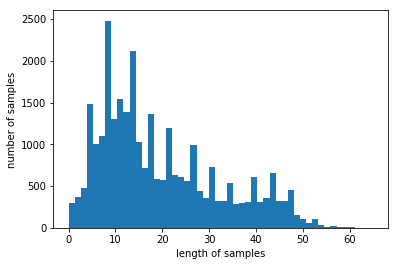

In [37]:
# 시각화
import matplotlib.pyplot as plt

# 길이 분포 확인
print('최대 길이 :',max(len(l) for l in tokenized_data))
print('평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in sns['text']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Step4) Embedding 
#### Skip_gram & Fasttext

In [138]:
#1) skip_Gram

from gensim.models import Word2Vec
# input format : [["my", "name", "is", "jamie"], ["jamie", "is", "cute"]]
# size : 임베딩 차원
# window : 윈도우 사이즈
# min_count : 고려할 단어의 최소 빈도 기준
# workers : cpu core 수
# iter : 반복 학습 횟수(epoch)
# sg : 0 -> CBOW, 1 -> Skip-Gram
# CBOW_model - Word2Vec(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)

#임베딩(w2v_skipgram)모델 생성
Skip_Gram_model = Word2Vec(sns['text'], size=100, window=5, min_count=5, workers=4, iter=100, sg=1)
#포스태깅된 데이터를 100차원의 벡터로 바꿔줘라
#주변단어(window)는 앞뒤로 5개까지 보되, corpus내 출현빈도가 5번 미만인 단어는 분석에서 제외해라
#100번 반복학습해라

In [40]:
# 완성된 임베딩 매트릭스의 크기 확인
Skip_Gram_model.wv.vectors.shape

(11181, 100)

In [41]:
# text 토큰 임베딩 벡터
vectors = Skip_Gram_model.wv.vectors
vectors

array([[-0.01077802, -0.00899496, -0.02078135, ..., -0.01762542,
        -0.03620273, -0.1226458 ],
       [-0.09839401, -0.2447234 , -0.22615296, ..., -0.2557072 ,
        -0.48517606, -0.02099956],
       [ 0.09274065, -0.24829307,  0.02042667, ..., -0.04823538,
        -0.091688  , -0.19740947],
       ...,
       [-0.17035885, -0.56074506,  0.5020157 , ...,  0.01579605,
        -0.22307462, -0.46464065],
       [-0.10574853, -0.88583684,  0.9495434 , ..., -0.13234006,
        -0.77110165,  0.3157957 ],
       [-0.2686859 ,  0.6010138 ,  0.48328748, ..., -0.7619063 ,
         0.61424345, -0.6919581 ]], dtype=float32)

In [141]:
#2) #fasttext

from gensim.models import FastText
ft_model = FastText(tokenized_data, size=100, window=5, min_count=5, workers=4, sg=1)

In [143]:
#크기 확인
ft_model.wv.vectors.shape

(11181, 100)

In [144]:
#임베딩 벡터
ft_vectors = ft_model.wv.vectors
ft_vectors

array([[ 0.30489194,  0.56053036, -0.4338167 , ..., -0.44392017,
         0.11215162, -0.18599671],
       [-0.55829835,  0.4987755 , -0.5144763 , ..., -0.78955644,
         0.03638387,  0.33461845],
       [ 0.20346366,  0.37955505, -0.44145393, ..., -0.4519078 ,
         0.1553256 , -0.2569842 ],
       ...,
       [-0.19985695,  0.56634164, -0.42563775, ..., -0.3654145 ,
         0.30055523, -0.29441804],
       [-0.1802686 ,  0.30220586, -0.28582817, ..., -0.15215264,
         0.09125539, -0.00912474],
       [-0.01423844,  0.6903415 , -0.38927495, ..., -0.38593128,
         0.16236265, -0.15343273]], dtype=float32)

## Step5) 인사이트 도출

### 코사인 유사도를 바탕으로 임베딩 점검하고 여러 측면으로 나누어 해석

**"Let data tell a story"**

개인적으로 좋아하는 말이다. 데이터는 그 자체로 스토리텔링을 하고 있다고 믿는다.

따라서 인사이트라고 하기엔 뭐하지만 내가 크롤링한 데이터를 바탕으로 사람들의 삶과 생각을 읽어보고자 했다.

### 1. 사회적 측면

In [134]:
#skipgram
Skip_Gram_model.most_similar('코로나/Noun', topn=10)  #코로나 토큰과 유사한 top10개 보기  #word2vec 코사인 유사도!

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('휩쓰면/Noun', 0.5075224041938782),
 ('아이콘/Noun', 0.4991481304168701),
 ('윤현/Noun', 0.4971848428249359),
 ('훈훈해/Adjective', 0.4965938329696655),
 ('파인더/Noun', 0.49608269333839417),
 ('도우미/Noun', 0.4946445822715759),
 ('나돌다/Verb', 0.49427956342697144),
 ('강서/Noun', 0.487418532371521),
 ('신생/Noun', 0.48565903306007385),
 ('놀고싶어/Verb', 0.4764033555984497)]

'나돌다', '놀고싶어'....안타까운 결과다...

In [145]:
# fasttext
ft_model.most_similar('코로나/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('로나/Noun', 0.9171261787414551),
 ('카나/Noun', 0.8240894079208374),
 ('서나/Noun', 0.8212686777114868),
 ('구나/Noun', 0.8204638957977295),
 ('차이나/Noun', 0.8203763961791992),
 ('리나/Noun', 0.8180626630783081),
 ('시나/Noun', 0.8165311813354492),
 ('이나/Noun', 0.8155238628387451),
 ('참나/Noun', 0.8143689036369324),
 ('지나/Noun', 0.8120629787445068)]

fasttext는 skipgram 임베딩 결과와 달리 맥락보다 형태적 유사도를 바탕으로 분류가 되었다. 

In [59]:
# 우한 유사도 top10
Skip_Gram_model.most_similar('우한/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('폐렴/Noun', 0.8742033243179321),
 ('중국/Noun', 0.6045466661453247),
 ('톈허/Noun', 0.6017547845840454),
 ('삿바/Noun', 0.5985016822814941),
 ('질병예방/Noun', 0.5839158296585083),
 ('바이두바이커/Noun', 0.5792067646980286),
 ('허베이성/Noun', 0.5705990791320801),
 ('텐진/Noun', 0.5574871301651001),
 ('수산시장/Noun', 0.5373929738998413),
 ('이끌고/Verb', 0.5303279161453247)]

In [146]:
ft_model.most_similar('우한/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('중국/Noun', 0.8951078653335571),
 ('남한/Noun', 0.8949958086013794),
 ('북한/Noun', 0.8936218023300171),
 ('당한/Noun', 0.8921654224395752),
 ('시진핑/Noun', 0.8908569812774658),
 ('은폐/Noun', 0.8876701593399048),
 ('원한/Noun', 0.8872519731521606),
 ('극한/Noun', 0.8853716850280762),
 ('다한/Noun', 0.8847604990005493),
 ('원인/Noun', 0.8844790458679199)]

'우한'의 결과는 두 임베딩 결과 모두 비슷하게 나왔지만 역시나 fasttext는 skipgram보다 맥락을 고려하지 못하고 있다.

In [46]:
# 마스크 유사도 top10
Skip_Gram_model.most_similar('마스크/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('착용/Noun', 0.6244187355041504),
 ('부족해지자/Adjective', 0.5973881483078003),
 ('쓰고/Verb', 0.585475504398346),
 ('면/Noun', 0.5514286160469055),
 ('재소/Noun', 0.5468919277191162),
 ('스킨/Noun', 0.5459015369415283),
 ('천장/Noun', 0.5449235439300537),
 ('장갑/Noun', 0.5402153134346008),
 ('수제/Noun', 0.5391348600387573),
 ('위험해요/Adjective', 0.5368421077728271)]

마스크 착용, 면마스크, 마스크 부족 , 수제 등등 연관성있는 단어들이 눈에 띈다

In [147]:
ft_model.most_similar('마스크/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('데스크/Noun', 0.932606041431427),
 ('뉴스데스크/Noun', 0.908108115196228),
 ('손/Noun', 0.8911290168762207),
 ('마이크/Noun', 0.8864421248435974),
 ('핑크/Noun', 0.8853853940963745),
 ('마크/Noun', 0.8764438629150391),
 ('스테이크/Noun', 0.8756364583969116),
 ('케이크/Noun', 0.8751972913742065),
 ('재테크/Noun', 0.8745579719543457),
 ('링크/Noun', 0.8699167966842651)]

형태적 유사도에 집중하는 fasttext는 사회적맥락이 중요한 코로나 sns 분석에 큰 의미가 없을 것이라 판단하여 앞으로의 해석에서는 skipgram 임베딩 결과만 출력해보겠다  

In [47]:
# 유사도 top10
Skip_Gram_model.most_similar('약국/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('공적/Noun', 0.49894922971725464),
 ('마스크/Noun', 0.4797772169113159),
 ('구매/Noun', 0.45300376415252686),
 ('총알/Noun', 0.4518851637840271),
 ('봉인/Noun', 0.44986820220947266),
 ('부제/Noun', 0.4426433742046356),
 ('아쉽/Adjective', 0.43270426988601685),
 ('우체국/Noun', 0.4307692050933838),
 ('달성군/Noun', 0.4264782667160034),
 ('세척/Noun', 0.41861289739608765)]

공적마스크 구매와 더불어 우체국, 부제, 아쉽다 등등 실제로도 유사한 단어들이 잘 구분되었다

In [49]:
# 유사도 top10
Skip_Gram_model.most_similar('감염/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('집단/Noun', 0.6724318265914917),
 ('이창식/Noun', 0.5742954015731812),
 ('비말/Noun', 0.5601491928100586),
 ('서장/Noun', 0.5475534796714783),
 ('구약/Noun', 0.5333043336868286),
 ('은평/Noun', 0.5302834510803223),
 ('원조/Noun', 0.5111789703369141),
 ('파고든/Verb', 0.5091777443885803),
 ('지다/Noun', 0.5073047876358032),
 ('롤러코스터/Noun', 0.5042067766189575)]

집단감염, 비말감염

In [50]:
# 유사도 top10
Skip_Gram_model.most_similar('대구/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('경북/Noun', 0.752199649810791),
 ('고교/Noun', 0.5137338638305664),
 ('적십자/Noun', 0.513382613658905),
 ('요양/Noun', 0.5109434127807617),
 ('청소년/Noun', 0.5070213675498962),
 ('대구시/Noun', 0.4987078309059143),
 ('자단/Noun', 0.4959125220775604),
 ('무능해서/Adjective', 0.49038296937942505),
 ('강연주/Noun', 0.4885464012622833),
 ('달서구/Noun', 0.48453810811042786)]

대구 경북, 요양병원, 달서구 

In [53]:
# 유사도 top10
Skip_Gram_model.most_similar('입국/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('금지/Noun', 0.6889638900756836),
 ('느는데/Verb', 0.5888922214508057),
 ('제한/Noun', 0.5704097747802734),
 ('중국인/Noun', 0.5577923059463501),
 ('절차/Noun', 0.5417514443397522),
 ('출입국/Noun', 0.5029005408287048),
 ('외국인/Noun', 0.4993492364883423),
 ('개국/Noun', 0.4961320161819458),
 ('여행객/Noun', 0.49294400215148926),
 ('유입/Noun', 0.4887566864490509),
 ('강력하게/Adjective', 0.4872816801071167),
 ('비행기표/Noun', 0.47983771562576294),
 ('전면/Noun', 0.4792475700378418),
 ('추방/Noun', 0.4774077832698822),
 ('세워야/Verb', 0.4746350049972534),
 ('국경/Noun', 0.4733814299106598),
 ('교민/Noun', 0.46635013818740845),
 ('했냐고/Verb', 0.46576082706451416),
 ('특별/Noun', 0.4653000235557556),
 ('한국인/Noun', 0.4602375626564026)]

놀랍다 그 어떤 단어도 유사하지 않은게 없다. 가장 현실반영 잘 된 것..! 추방이 눈에 띈다

In [54]:
# 유사도 top10
Skip_Gram_model.most_similar('병원/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('영남대/Noun', 0.6792091131210327),
 ('요양/Noun', 0.6276236772537231),
 ('세브란스병원/Noun', 0.5754213333129883),
 ('서울대/Noun', 0.5532812476158142),
 ('연세대/Noun', 0.5521091222763062),
 ('검사/Noun', 0.5361274480819702),
 ('사망진단서/Noun', 0.5236315727233887),
 ('정군/Noun', 0.5194159746170044),
 ('찾아낸/Verb', 0.5193116068840027),
 ('환자/Noun', 0.5142494440078735),
 ('검체/Noun', 0.5106180906295776),
 ('입원/Noun', 0.5046656727790833),
 ('대학병원/Noun', 0.49774616956710815),
 ('오염/Noun', 0.4962483048439026),
 ('진료/Noun', 0.49352580308914185),
 ('썼지만/Verb', 0.4783819317817688),
 ('보건소/Noun', 0.4752546548843384),
 ('고교/Noun', 0.47287020087242126),
 ('일까봐/Verb', 0.4688985049724579),
 ('바꾸자/Verb', 0.46415355801582336)]

이 날이 고교생 사망과 함께 영남대 진단 오류, 실험실 오염 등 논란이 되었던 날이라 그런지 그에 관련한 단어들이 많이 보인다

In [131]:
# 유사도 top10
Skip_Gram_model.most_similar('의심/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('증상/Noun', 0.5723296999931335),
 ('환자/Noun', 0.555870532989502),
 ('높인/Verb', 0.5558018088340759),
 ('소견/Noun', 0.5377171039581299),
 ('검체/Noun', 0.5305964946746826),
 ('혈관/Noun', 0.5205141305923462),
 ('판정/Noun', 0.5114356279373169),
 ('외래/Noun', 0.5074198246002197),
 ('해열제/Noun', 0.5062144994735718),
 ('음성/Noun', 0.49498629570007324)]

In [132]:
# 유사도 top10
Skip_Gram_model.most_similar('거리/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('두기/Noun', 0.914262056350708),
 ('사회/Noun', 0.6295902729034424),
 ('격전/Noun', 0.5533599257469177),
 ('뒹굴/Adverb', 0.547209620475769),
 ('적/Suffix', 0.4924393594264984),
 ('실천/Noun', 0.47976458072662354),
 ('미터/Noun', 0.4786689281463623),
 ('답답함을/Adjective', 0.4732500910758972),
 ('강하지/Adjective', 0.46507686376571655),
 ('기와/Noun', 0.45625707507133484),
 ('습관/Noun', 0.45445185899734497),
 ('나오게/Verb', 0.45151087641716003),
 ('말레이시아/Noun', 0.4506259858608246),
 ('캠페인/Noun', 0.4437711238861084),
 ('멀리/Noun', 0.43990546464920044),
 ('좋아함/Adjective', 0.435860276222229),
 ('다자/Noun', 0.43494266271591187),
 ('피하/Noun', 0.4194166660308838),
 ('무차별/Noun', 0.4167367219924927),
 ('귀엽다/Adjective', 0.4157494604587555)]

사회적 거리두기 캠페인 실천과 뒹굴거리며 답답함을 느끼는 사람들의 심정이 느껴진다

In [97]:
# 유사도 top10
Skip_Gram_model.most_similar('자가/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('격리/Noun', 0.9290043115615845),
 ('해제/Noun', 0.5681867599487305),
 ('의하자/Adjective', 0.5575057864189148),
 ('어기/Noun', 0.5558596253395081),
 ('석회/Noun', 0.5313794016838074),
 ('펜싱/Noun', 0.515652060508728),
 ('불응/Noun', 0.5154219269752502),
 ('국가대표/Noun', 0.5139994621276855),
 ('능동/Noun', 0.5114240646362305),
 ('모니터링/Noun', 0.5050349235534668)]

국가대표 펜싱선수 확진 뜬 날이라 관련 키워드 보인다

In [67]:
# 마스크 유사도 top10
Skip_Gram_model.most_similar('개강/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('개학/Noun', 0.5673046112060547),
 ('연기/Noun', 0.5394340753555298),
 ('탈주/Noun', 0.525506317615509),
 ('휴강/Noun', 0.5099022388458252),
 ('꼬마/Noun', 0.509502649307251),
 ('미뤄지고/Verb', 0.5087865591049194),
 ('놀고싶은데/Verb', 0.49624377489089966),
 ('미뤄진/Verb', 0.4843156039714813),
 ('학교/Noun', 0.48240816593170166),
 ('수강/Noun', 0.47399207949638367),
 ('인강/Noun', 0.46781572699546814),
 ('쉬는거/Verb', 0.4658023715019226),
 ('입학/Noun', 0.4654430150985718),
 ('ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ/KoreanParticle', 0.46158328652381897),
 ('토익/Noun', 0.4586566686630249),
 ('방방/Adverb', 0.45765647292137146),
 ('덕질/Noun', 0.4559735655784607),
 ('돌려내/Verb', 0.45550575852394104),
 ('미뤄져서/Verb', 0.455122709274292),
 ('쪄/Verb', 0.4528540372848511)]

개강이 미뤄져서 슬퍼하는 사람들의 외침이 보인다

In [104]:
# 유사도 top10
Skip_Gram_model.most_similar('연기/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('일간스포츠/Noun', 0.6557430624961853),
 ('개학/Noun', 0.643510103225708),
 ('팬미팅/Noun', 0.6162576675415039),
 ('훈훈해/Adjective', 0.5885958671569824),
 ('일정/Noun', 0.579013466835022),
 ('취소/Noun', 0.5755366683006287),
 ('디스패치/Noun', 0.5753706693649292),
 ('남도현/Noun', 0.567765474319458),
 ('개강/Noun', 0.5394340753555298),
 ('월/Noun', 0.5250983238220215),
 ('이한결/Noun', 0.5246890783309937),
 ('조율/Noun', 0.5237628221511841),
 ('올림픽/Noun', 0.5210853815078735),
 ('스포츠동아/Noun', 0.5113621950149536),
 ('엑스포츠/Noun', 0.5105628967285156),
 ('일본팬미팅/Noun', 0.5105453729629517),
 ('부처님오신날/Noun', 0.5102071762084961),
 ('신입생/Noun', 0.50788414478302),
 ('무기한/Noun', 0.49847105145454407),
 ('블루맨/Noun', 0.4968908727169037)]

트위터는 덕질계정들이 상당히 많기때문에 연예관련 키워드들이 많이 보이는것

### 2. 경제적 측면

In [57]:
# 경제 유사도 top10
Skip_Gram_model.most_similar('경제/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('장하준/Noun', 0.5410598516464233),
 ('활성화/Noun', 0.5267013907432556),
 ('말아먹다시피/Verb', 0.5082133412361145),
 ('서민/Noun', 0.5067473649978638),
 ('노동계/Noun', 0.49598491191864014),
 ('금융시장/Noun', 0.49522826075553894),
 ('논설/Noun', 0.4918571412563324),
 ('전시체제/Noun', 0.49172443151474),
 ('금융/Noun', 0.4872881770133972),
 ('급속도/Noun', 0.4826720654964447),
 ('비상/Noun', 0.48100411891937256),
 ('금융위기/Noun', 0.47850507497787476),
 ('대통령/Noun', 0.47835028171539307),
 ('톈허/Noun', 0.47789478302001953),
 ('침체/Noun', 0.4773617386817932),
 ('커지자/Verb', 0.4773472547531128),
 ('뉴데일리/Noun', 0.4723937511444092),
 ('근본/Noun', 0.4720093905925751),
 ('사우스차이나/Noun', 0.47071373462677),
 ('경제위기/Noun', 0.4695487320423126)]

역시나 위기, 침체, 말아먹다시피 등 부정적 키워드들이 많이 보인다

In [55]:
# 주식 유사도 top10
Skip_Gram_model.most_similar('주식/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('투자/Noun', 0.6193395256996155),
 ('투자자/Noun', 0.5797792077064514),
 ('핫이슈/Noun', 0.5658377408981323),
 ('채권/Noun', 0.5155479311943054),
 ('폭락/Noun', 0.513617753982544),
 ('급전/Noun', 0.5102337598800659),
 ('바카라/Noun', 0.5073958039283752),
 ('디비/Noun', 0.49435144662857056),
 ('석유/Noun', 0.47741299867630005),
 ('회사채/Noun', 0.47547319531440735),
 ('펀드/Noun', 0.4728976786136627),
 ('최저/Noun', 0.46935194730758667),
 ('코스피/Noun', 0.4684780240058899),
 ('코스닥/Noun', 0.46775248646736145),
 ('재테크/Noun', 0.4623093903064728),
 ('임금/Noun', 0.45653456449508667),
 ('줍/Verb', 0.4553532600402832),
 ('금감원/Noun', 0.4531744420528412),
 ('손가락질/Noun', 0.45175305008888245),
 ('증시/Noun', 0.44446101784706116)]

폭락.....

In [56]:
# 유사도 top10
Skip_Gram_model.most_similar('사재기/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('마트/Noun', 0.5266636610031128),
 ('소염제/Noun', 0.4724274277687073),
 ('타이레놀/Noun', 0.46403107047080994),
 ('기류/Noun', 0.46274375915527344),
 ('현상/Noun', 0.4514361619949341),
 ('휴지/Noun', 0.4511549174785614),
 ('량/Noun', 0.4337419271469116),
 ('일자리/Noun', 0.4221171736717224),
 ('공포/Noun', 0.42096033692359924),
 ('제한/Noun', 0.4157482981681824),
 ('화장지/Noun', 0.41365861892700195),
 ('쓰지/Verb', 0.41232556104660034),
 ('조심하는/Verb', 0.40760624408721924),
 ('린다/Noun', 0.4063550531864166),
 ('생필품/Noun', 0.4040566682815552),
 ('파리/Noun', 0.40357065200805664),
 ('꾼/Noun', 0.4024525582790375),
 ('필수품/Noun', 0.4020421802997589),
 ('흔들리나/Verb', 0.4020189046859741),
 ('베르가모/Noun', 0.40140867233276367)]

WHO에서 약한 증상이 느껴질땐 타이레놀 먹으라고 해서 그런지 소염제, 타이레놀 단어도 보인다

### 희망적 측면

In [74]:
# 마스크 유사도 top10
Skip_Gram_model.most_similar('극복/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('성금/Noun', 0.6336547136306763),
 ('부여군/Noun', 0.5947201251983643),
 ('박정현/Noun', 0.5787398219108582),
 ('올려주신/Verb', 0.5766156315803528),
 ('알아보겠습니다/Verb', 0.5694980621337891),
 ('캘/Verb', 0.554419755935669),
 ('무안군/Noun', 0.5512186288833618),
 ('산내면/Noun', 0.5497168898582458),
 ('병규/Noun', 0.54867023229599),
 ('군민/Noun', 0.5482879877090454)]

In [76]:
# 유사도 top10
Skip_Gram_model.most_similar('기부/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('동참/Noun', 0.580726146697998),
 ('이미경/Noun', 0.5649749040603638),
 ('엄지원/Noun', 0.5649003982543945),
 ('라울/Noun', 0.5616108179092407),
 ('군민/Noun', 0.5577333569526672),
 ('성금/Noun', 0.5564364790916443),
 ('벨벳/Noun', 0.5500620603561401),
 ('해피빈/Noun', 0.5477738380432129),
 ('아이유/Noun', 0.5420583486557007),
 ('아이린/Noun', 0.5364487767219543),
 ('고창/Noun', 0.5316169261932373),
 ('릴레이/Noun', 0.5314245223999023),
 ('기탁/Noun', 0.5292219519615173),
 ('출연료/Noun', 0.5040852427482605),
 ('전달/Noun', 0.499144971370697),
 ('레드/Noun', 0.4985714554786682),
 ('물결/Noun', 0.49643614888191223),
 ('양제/Noun', 0.4958917498588562),
 ('써드/Noun', 0.48991018533706665),
 ('적십자사/Noun', 0.48425763845443726)]

기부릴레이, 성금 기탁 등 따뜻한 단어들이 많이 보인다

In [95]:
# 유사도 top10
Skip_Gram_model.most_similar('힘/Noun', topn=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('지혜/Noun', 0.4912354648113251),
 ('보태/Noun', 0.4855969548225403),
 ('관세청/Noun', 0.4837346374988556),
 ('냅시다/Verb', 0.47782349586486816),
 ('이겨/Verb', 0.45762747526168823),
 ('초이스/Noun', 0.45621195435523987),
 ('용기/Noun', 0.4533344507217407),
 ('힘내요/Verb', 0.44162610173225403),
 ('긍정/Noun', 0.43277454376220703),
 ('중요성/Noun', 0.4322911500930786)]

이겨냅시다...흑

# 4. 이시국에 사람들은 뭘할까?

In [110]:
# 유사도 top10
Skip_Gram_model.most_similar('집콕/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('홈트/Noun', 0.49727270007133484),
 ('문학/Noun', 0.4474986791610718),
 ('보람/Noun', 0.44544556736946106),
 ('순이/Noun', 0.44465315341949463),
 ('자유롭게/Adjective', 0.4399973154067993),
 ('조심하셔요/Verb', 0.43985867500305176),
 ('헌터/Noun', 0.4354889690876007),
 ('방콕/Noun', 0.43510839343070984),
 ('피시방/Noun', 0.4321819543838501),
 ('오열/Noun', 0.43188226222991943),
 ('찐자/Verb', 0.4305286705493927),
 ('미싱/Noun', 0.4254419207572937),
 ('집밖/Noun', 0.4250043034553528),
 ('룩/Suffix', 0.42497819662094116),
 ('위험해서/Adjective', 0.4241822063922882),
 ('없어지길/Verb', 0.4187736511230469),
 ('어느덧/Adjective', 0.416181743144989),
 ('행복해요/Adjective', 0.41346096992492676),
 ('흡/Exclamation', 0.41271835565567017),
 ('소년단/Noun', 0.41033655405044556)]

키워드들을 조합해보면 "집밖은 위험해서 조심해야하고 코로나가 없어지길 바란다.피시방에 가고싶지만 방콕하며 홈트를 한다"고 볼 수 있겠다

In [112]:
# 유사도 top10
Skip_Gram_model.most_similar('홈트/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('망가지는/Verb', 0.5196386575698853),
 ('집콕/Noun', 0.49727267026901245),
 ('조진다/Adjective', 0.49281176924705505),
 ('운동/Noun', 0.48869627714157104),
 ('나가니/Verb', 0.47398799657821655),
 ('필라테스/Noun', 0.4702260494232178),
 ('버스비/Noun', 0.46327751874923706),
 ('생활/Noun', 0.45687294006347656),
 ('스트레스/Noun', 0.4522266387939453),
 ('잠도/Noun', 0.4507177770137787),
 ('출퇴근길/Noun', 0.4467461109161377),
 ('알아보겠습니다/Verb', 0.4360382556915283),
 ('써서/Verb', 0.43593376874923706),
 ('지내세요/Verb', 0.43339836597442627),
 ('진흥/Noun', 0.42850303649902344),
 ('출근/Noun', 0.4284380078315735),
 ('먹기/Noun', 0.42650294303894043),
 ('하고싶다/Verb', 0.42549216747283936),
 ('찔끔/Adverb', 0.42513173818588257),
 ('피시방/Noun', 0.42447468638420105)]

"집콕하며 망가지는 몸을 위해 운동을 조진다.."

홈트 연관어에도 피시방이 보인다

In [118]:
# 유사도 top10
Skip_Gram_model.most_similar('피시방/Noun', topn=20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('헌터/Noun', 0.5971020460128784),
 ('인증샷/Noun', 0.46951958537101746),
 ('옵치/Verb', 0.4663158059120178),
 ('노래방/Noun', 0.4644661545753479),
 ('갯방풍/Noun', 0.4482993483543396),
 ('서든/Noun', 0.4426552355289459),
 ('걸리나/Verb', 0.4422922134399414),
 ('강서/Noun', 0.44033849239349365),
 ('도우미/Noun', 0.43711066246032715),
 ('렴/Noun', 0.435378760099411),
 ('지하상가/Noun', 0.4333663582801819),
 ('집콕/Noun', 0.4321819543838501),
 ('뛰고/Verb', 0.43129992485046387),
 ('워치/Noun', 0.4279800057411194),
 ('홈트/Noun', 0.42447471618652344),
 ('걷기/Noun', 0.42411622405052185),
 ('숨비/Noun', 0.4221362769603729),
 ('비바리/Noun', 0.4217507839202881),
 ('스트레칭/Noun', 0.4205741584300995),
 ('대피소/Noun', 0.4196932017803192)]

원래 피시방, 게임 등과 유사한 단어들 말고 시국이 시국이라 그런지 스트레칭, 걷기, 뛰기 등과 같은 운동관련키워드들이 보인다

[idea] 
**물론 이미 유튜브에 홈트 영상이 판을 치지만 이시국 특별 맞춤형 집에서 할만한 운동이나 스트레칭 관련한 콘텐츠를 더욱 재밌고 활동적이게 만든다면 집콕하면서 축축 쳐져있는 사람들의 기운을 살릴 수 있지 않을까? 온라인몰에서는 시국이 시국인 만큼 배송비 쿠폰이나 집콕하며 지루한 사람들을 확 사로잡을 이벤트를 기획한다면 브랜드 이미지 개선과 더불어 매출 증대로도 이어질 수 있겠다**

구글링 결과 pre-trained model, negative sampling, Spearman Rank Correlation 등 시도해보고 싶은 방법들이 있었으나 개강하고 빡빡한 일정에 시간을 내지 못했다ㅜ ... 텍스트 심화 세미나에서 갈아 넣어야겠다.